In [2]:
import os
from pathlib import Path
import laspy
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import pandas as pd
import re
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import imageio
import seaborn as sns
from datetime import datetime, timedelta
from numpy.polynomial.polynomial import Polynomial
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image
import scipy.io as sio
from scipy.stats import mode
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# from grid_utils import *
import numpy as np
from matplotlib.colors import LightSource
from matplotlib.colors import ListedColormap

In [3]:
cropped_clusters= np.load("/Users/cjmack/Documents/Papers/Cliffs/Code/local_grids/cleaned/ero_cropped_clusters_cleaned.npz")['data']
cropped_grid = np.load("/Users/cjmack/Documents/Papers/Cliffs/Code/local_grids/cleaned/ero_cropped_grid_cleaned.npz")['data']

# full_grid = np.load("/Users/cjmack/Documents/Papers/Cliffs/Code/local_grids/grid.npz")['data']
# grid_files = np.load("/Users/cjmack/Documents/Papers/Cliffs/Code/local_grids/grid_files.npz")['data']

# acc_cropped_grid = np.load("/Users/cjmack/Documents/Papers/Cliffs/Code/local_grids/acc_cropped_grid.npz")['data']
# acc_cropped_clusters = np.load("/Users/cjmack/Documents/Papers/Cliffs/Code/local_grids/acc_cropped_clusters.npz")['data']

# acc_grid_files = np.load("/Users/cjmack/Documents/Papers/Cliffs/Code/local_grids/acc_grid_files.npz")['data']
# acc_cluster_files = np.load("/Users/cjmack/Documents/Papers/Cliffs/Code/local_grids/acc_cluster_files.npz")['data']

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource, LinearSegmentedColormap

def create_custom_jet_colormap():
    # Get the 'jet' colormap with 256 colors
    jet = plt.cm.get_cmap('jet', 256)
    jet_colors = jet(np.linspace(0, 1, 256))
    
    # Replace the first 10% (~25 colors) of the colormap with white
    jet_colors[:3, :] = [1, 1, 1, 1]
    
    # Create a new colormap from this modified list of colors
    custom_jet = LinearSegmentedColormap.from_list('custom_jet', jet_colors)
    return custom_jet

def plot_summed_grid(grid_3d_array, vmax, subset=None, wide=False):
    """
    Plot the 2D sum of the 3D grid data with a hillshade overlay.
    This version mimics the axes and tick labels of an older version and fixes the subset functionality.
    
    Parameters:
      grid_3d_array (np.ndarray): 3D array of shape (time_steps, n, m)
      vmax (float): maximum value for color scaling
      subset (tuple, optional): tuple of (min, max) x-axis limits in data coordinates
      wide (bool, optional): use a wide figure layout if True
    """
    # Sum over the time dimension and transpose to swap axes
    summed_grid = np.nansum(grid_3d_array, axis=0).T

    # Prepare colormap and mask NaNs
    cmap = create_custom_jet_colormap()
    cmap.set_bad(color='white')
    masked_summed_grid = np.ma.masked_invalid(summed_grid)
    
    # Create hillshade
    ls = LightSource(azdeg=315, altdeg=45)
    hillshade = ls.hillshade(summed_grid, vert_exag=2, dx=0.1, dy=0.1)
    
    # Define the data extent.
    # Here we assume that the x-axis should run from 5000 to 25000 and y from 0 to 280,
    # which will let us mimic the older version’s tick positions and labels.
    n_bins = summed_grid.shape[1]  # number of alongshore bins
    extent = [0, n_bins, 0, 280]    # or use the appropriate physical conversion
    # extent = [5000, 25000, 0, 280]
    
    # Create the figure
    if wide:
        fig, ax = plt.subplots(figsize=(30, 4))
    else:
        fig, ax = plt.subplots(figsize=(20, 6))
    
    # Plot the summed grid and overlay the hillshade using the same extent.
    cax = ax.imshow(masked_summed_grid, cmap=cmap, origin='lower', aspect='auto',
                    vmin=0, vmax=vmax, extent=extent)
    ax.imshow(hillshade, cmap='gray', origin='lower', aspect='auto',
              alpha=0.3, extent=extent)
    
    # Add colorbar and labels
    fig.colorbar(cax, label='Sum')
    ax.set_xlabel('Alongshore Meter')
    ax.set_ylabel('Height (m)')
    ax.set_title('Cumulative Erosion with Hillshade', fontsize=16)
    
    # Convert y-axis tick labels from 10 cm units to meters
    yticks = ax.get_yticks()
    ax.set_yticklabels([f'{int(tick/10)}' for tick in yticks])
    
    # Set x-axis ticks to mimic older version: positions in data coords with custom labels
    # xtick_positions = [5000, 10000, 15000, 20000, 25000]
    xtick_positions = [0, 5000, 10000, 15000, 20000]
    xtick_labels = [0, 500, 1000, 1500, 2000]
    ax.set_xticks(xtick_positions)
    ax.set_xticklabels([str(label) for label in xtick_labels])
    
    # Handle subset: if a subset is provided, set the x-limits accordingly.
    # Because the image is plotted with extent, the x-axis is in real-world units.
    # To maintain the inversion seen in the older version, we set the limits in reversed order.
    if subset:
        ax.set_xlim(subset[1], subset[0])
    else:
        ax.invert_xaxis()
    
    ax.set_ylim(0, 280)
    
    plt.show()

/var/folders/wy/tbzk6rdx0_5d5y5p18xzqyfm0000gn/T/ipykernel_36836/3862447188.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', 256)
/var/folders/wy/tbzk6rdx0_5d5y5p18xzqyfm0000gn/T/ipykernel_36836/3862447188.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(tick/10)}' for tick in yticks])


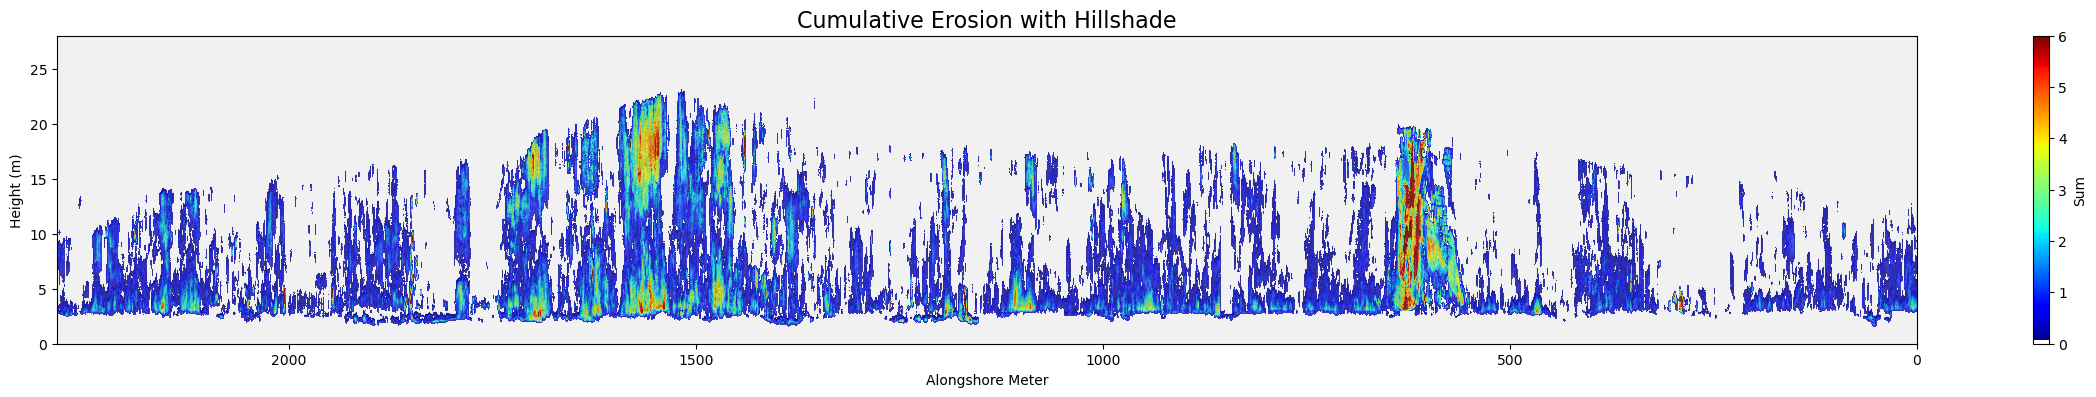

/var/folders/wy/tbzk6rdx0_5d5y5p18xzqyfm0000gn/T/ipykernel_36836/3862447188.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', 256)
/var/folders/wy/tbzk6rdx0_5d5y5p18xzqyfm0000gn/T/ipykernel_36836/3862447188.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(tick/10)}' for tick in yticks])


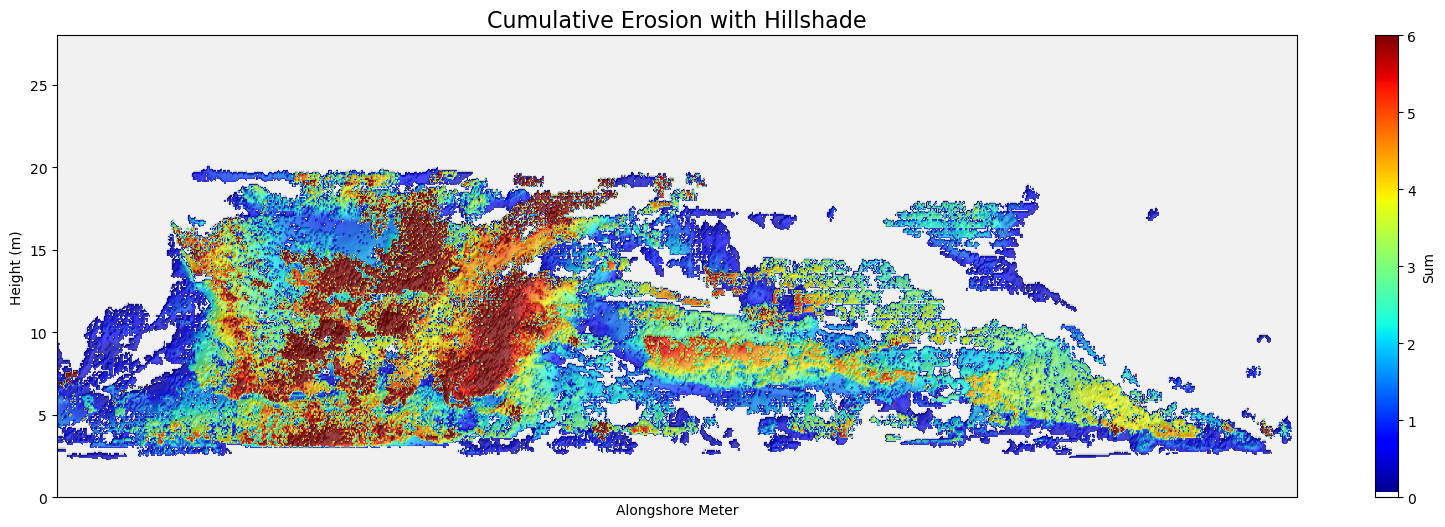

/var/folders/wy/tbzk6rdx0_5d5y5p18xzqyfm0000gn/T/ipykernel_36836/3862447188.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet', 256)
/var/folders/wy/tbzk6rdx0_5d5y5p18xzqyfm0000gn/T/ipykernel_36836/3862447188.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(tick/10)}' for tick in yticks])


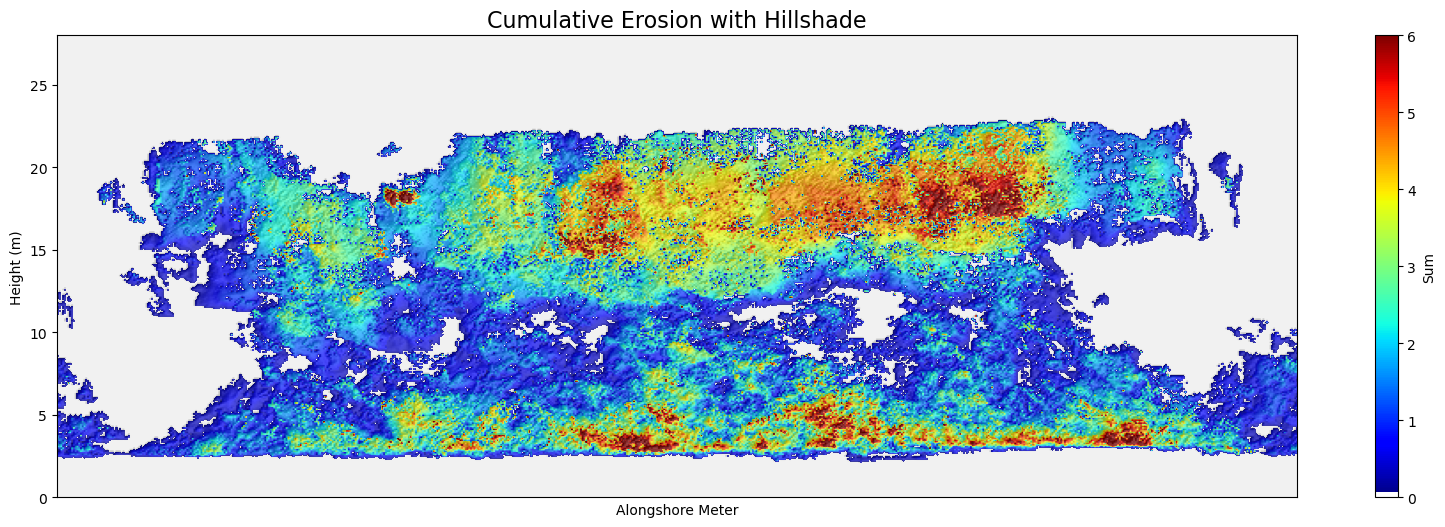

In [6]:
plot_summed_grid(cropped_grid, vmax=6, wide=True) # full
plot_summed_grid(cropped_grid, vmax=6, subset=[5500,6500], wide=False) # construction # meters 550-650
plot_summed_grid(cropped_grid, vmax=6, subset=[15300, 16000], wide=False) # hotspot